In [1]:
import pandas as pd
import os

# List of company symbols (as identified from your 'raw' folder screenshot)
symbols = [
    'RELIANCE', 'TCS', 'NESTLEIND', 'ICICIBANK', 'INFY', 'LT', 'ITC',
    'MARUTI', 'HINDUNILVR', 'SBIN', 'KOTAKBANK', 'WIPRO',
    'TITAN', 'M&M', 'SUNPHARMA'
]

# Define the absolute path to your dataset's 'raw' folder
# This path was confirmed by you previously: E:\my_python_envs\dataset\raw
# Use forward slashes for consistency in Python paths
data_dir = 'E:/my_python_envs/dataset/raw/'

# List to hold dataframes for each company
dfs = []

# Read each 1D CSV file and append to the list
print(f"Attempting to load 1D datasets from: {data_dir}")
for symbol in symbols:
    file_path = os.path.join(data_dir, f'{symbol}_1d.csv')
    try:
        df = pd.read_csv(file_path)
        df['Symbol'] = symbol  # Add a Symbol column to identify the stock
        dfs.append(df)
        print(f"Successfully loaded: {file_path}")
    except FileNotFoundError:
        print(f"WARNING: File not found for symbol {symbol} at {file_path}. Skipping this symbol.")
    except Exception as e:
        print(f"ERROR: An error occurred while reading file for symbol {symbol} at {file_path}: {e}")

# Check if any dataframes were loaded before concatenating
if not dfs:
    print("No dataframes were loaded. Please check the 'data_dir' path and ensure CSV files exist.")
    # You might want to exit or raise an error here if no data is critical
    combined_df = pd.DataFrame() # Create an empty DataFrame to avoid further errors
else:
    # Combine all loaded dataframes into a single dataframe
    combined_df = pd.concat(dfs, ignore_index=True)
    print("\nAll available 1D dataframes combined successfully!")

    # Convert 'timestamp' to datetime (assuming it's a column in your CSVs)
    # It's good practice to ensure this column exists before conversion
    if 'timestamp' in combined_df.columns:
        combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])
        print("Converted 'timestamp' column to datetime.")
    else:
        print("WARNING: 'timestamp' column not found. Please check your CSV file structure.")

    # Sort by Symbol and timestamp for correct feature calculation
    combined_df = combined_df.sort_values(by=['Symbol', 'timestamp']).reset_index(drop=True)
    print("Data sorted by Symbol and timestamp.")

    # Display the first few rows of the combined dataframe and its info
    print("\nFirst 5 rows of combined_df:")
    display(combined_df.head())
    print("\nInfo about combined_df:")
    combined_df.info()



Attempting to load 1D datasets from: E:/my_python_envs/dataset/raw/
Successfully loaded: E:/my_python_envs/dataset/raw/RELIANCE_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/TCS_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/NESTLEIND_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/ICICIBANK_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/INFY_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/LT_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/ITC_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/MARUTI_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/HINDUNILVR_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/SBIN_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/KOTAKBANK_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/WIPRO_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/TITAN_1d.csv
Successfully loaded: E:/my_python_envs/dataset/raw/M&M_1d.csv
Successfully loaded: E:/my

,timestamp,open,high,low,close,volume,Symbol
0,2022-01-23 18:30:00,2338.9,2344.95,2266.70,2284.60,2231103,HINDUNILVR
1,2022-01-24 18:30:00,2283.5,2333.70,2240.90,2327.25,1843543,HINDUNILVR
2,2022-01-26 18:30:00,2310.0,2325.60,2275.00,2295.35,2620474,HINDUNILVR
3,2022-01-27 18:30:00,2294.6,2318.70,2278.05,2283.55,1967721,HINDUNILVR
4,2022-01-30 18:30:00,2290.0,2311.85,2271.00,2273.75,1639875,HINDUNILVR



Info about combined_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825 entries, 0 to 12824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12825 non-null  datetime64[ns]
 1   open       12825 non-null  float64       
 2   high       12825 non-null  float64       
 3   low        12825 non-null  float64       
 4   close      12825 non-null  float64       
 5   volume     12825 non-null  int64         
 6   Symbol     12825 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 701.5+ KB


In [2]:
# Convert 'timestamp' to datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Sort by Symbol and timestamp
combined_df = combined_df.sort_values(by=['Symbol', 'timestamp'])

# Display the first few rows and info after cleaning and sorting
display(combined_df.head())
combined_df.info()

,timestamp,open,high,low,close,volume,Symbol
0,2022-01-23 18:30:00,2338.9,2344.95,2266.70,2284.60,2231103,HINDUNILVR
1,2022-01-24 18:30:00,2283.5,2333.70,2240.90,2327.25,1843543,HINDUNILVR
2,2022-01-26 18:30:00,2310.0,2325.60,2275.00,2295.35,2620474,HINDUNILVR
3,2022-01-27 18:30:00,2294.6,2318.70,2278.05,2283.55,1967721,HINDUNILVR
4,2022-01-30 18:30:00,2290.0,2311.85,2271.00,2273.75,1639875,HINDUNILVR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825 entries, 0 to 12824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12825 non-null  datetime64[ns]
 1   open       12825 non-null  float64       
 2   high       12825 non-null  float64       
 3   low        12825 non-null  float64       
 4   close      12825 non-null  float64       
 5   volume     12825 non-null  int64         
 6   Symbol     12825 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 701.5+ KB


In [3]:
# Create Lag Features (e.g., previous day's close and volume)
combined_df['Close_t-1'] = combined_df.groupby('Symbol')['close'].shift(1)
combined_df['Volume_t-1'] = combined_df.groupby('Symbol')['volume'].shift(1)

# Create Return Features (e.g., 1-day return)
combined_df['Return_1d'] = combined_df.groupby('Symbol')['close'].pct_change(1)

# Display the first few rows with the new features
display(combined_df.head())

,timestamp,open,high,low,close,volume,Symbol,Close_t-1,Volume_t-1,Return_1d
0,2022-01-23 18:30:00,2338.9,2344.95,2266.70,2284.60,2231103,HINDUNILVR,NaN,NaN,NaN
1,2022-01-24 18:30:00,2283.5,2333.70,2240.90,2327.25,1843543,HINDUNILVR,2284.60,2231103.0,0.018668
2,2022-01-26 18:30:00,2310.0,2325.60,2275.00,2295.35,2620474,HINDUNILVR,2327.25,1843543.0,-0.013707
3,2022-01-27 18:30:00,2294.6,2318.70,2278.05,2283.55,1967721,HINDUNILVR,2295.35,2620474.0,-0.005141
4,2022-01-30 18:30:00,2290.0,2311.85,2271.00,2273.75,1639875,HINDUNILVR,2283.55,1967721.0,-0.004292


In [4]:
%pip install ta

Note: you may need to restart the kernel to use updated packages.


In [5]:
import ta

# Calculate technical indicators
combined_df['SMA_10'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.trend.sma_indicator(x, window=10))
combined_df['SMA_50'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.trend.sma_indicator(x, window=50))
combined_df['RSI'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.momentum.rsi(x, window=14))
combined_df['MACD'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.trend.macd(x))
combined_df['MACD_Signal'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.trend.macd_signal(x))

# Calculate Bollinger Bands within transform and extract the bands
combined_df['Bollinger_High'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.volatility.BollingerBands(close=x, window=20, window_dev=2).bollinger_hband())
combined_df['Bollinger_Low'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.volatility.BollingerBands(close=x, window=20, window_dev=2).bollinger_lband())


# Create date features
combined_df['Day_of_Week'] = combined_df['timestamp'].dt.dayofweek
combined_df['Month'] = combined_df['timestamp'].dt.month

# Display the first few rows with the new features
display(combined_df.head())
combined_df.info()

,timestamp,open,high,low,close,volume,Symbol,Close_t-1,Volume_t-1,Return_1d,SMA_10,SMA_50,RSI,MACD,MACD_Signal,Bollinger_High,Bollinger_Low,Day_of_Week,Month
0,2022-01-23 18:30:00,2338.9,2344.95,2266.70,2284.60,2231103,HINDUNILVR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1
1,2022-01-24 18:30:00,2283.5,2333.70,2240.90,2327.25,1843543,HINDUNILVR,2284.60,2231103.0,0.018668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,2022-01-26 18:30:00,2310.0,2325.60,2275.00,2295.35,2620474,HINDUNILVR,2327.25,1843543.0,-0.013707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
3,2022-01-27 18:30:00,2294.6,2318.70,2278.05,2283.55,1967721,HINDUNILVR,2295.35,2620474.0,-0.005141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
4,2022-01-30 18:30:00,2290.0,2311.85,2271.00,2273.75,1639875,HINDUNILVR,2283.55,1967721.0,-0.004292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825 entries, 0 to 12824
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       12825 non-null  datetime64[ns]
 1   open            12825 non-null  float64       
 2   high            12825 non-null  float64       
 3   low             12825 non-null  float64       
 4   close           12825 non-null  float64       
 5   volume          12825 non-null  int64         
 6   Symbol          12825 non-null  object        
 7   Close_t-1       12810 non-null  float64       
 8   Volume_t-1      12810 non-null  float64       
 9   Return_1d       12810 non-null  float64       
 10  SMA_10          12690 non-null  float64       
 11  SMA_50          12090 non-null  float64       
 12  RSI             12630 non-null  float64       
 13  MACD            12450 non-null  float64       
 14  MACD_Signal     12330 non-null  float64       
 15  Bo

In [6]:
# Create the target variable: next day's return percentage
# Shift the 'Return_1d' column up by one day to get the next day's return
combined_df['Target_Return'] = combined_df.groupby('Symbol')['Return_1d'].shift(-1)

# Display the last few rows to see the target variable
display(combined_df.tail())

,timestamp,open,high,low,close,volume,Symbol,Close_t-1,Volume_t-1,Return_1d,SMA_10,SMA_50,RSI,MACD,MACD_Signal,Bollinger_High,Bollinger_Low,Day_of_Week,Month,Target_Return
12820,2025-06-29 18:30:00,266.1,266.74,262.90,265.98,7119563,WIPRO,265.05,8906108.0,0.003509,265.379,251.629,61.523320,4.352515,3.921066,274.315507,244.803493,6,6,-0.005376
12821,2025-06-30 18:30:00,265.5,268.35,263.70,264.55,3886095,WIPRO,265.98,7119563.0,-0.005376,265.543,252.151,58.625338,4.084721,3.953797,274.032269,246.919731,0,6,0.009261
12822,2025-07-01 18:30:00,265.0,268.70,264.45,267.00,8750887,WIPRO,264.55,3886095.0,0.009261,266.084,252.808,61.933688,4.023803,3.967798,273.777293,249.188707,1,7,0.000187
12823,2025-07-02 18:30:00,268.4,270.85,266.45,267.05,9357962,WIPRO,267.00,8750887.0,0.000187,266.231,253.277,62.000468,3.934208,3.961080,273.255776,251.621224,2,7,0.009923
12824,2025-07-04 03:45:00,268.3,271.10,267.55,269.70,7130122,WIPRO,267.05,9357962.0,0.009923,266.547,253.816,65.459049,4.030575,3.974979,272.699803,254.288197,4,7,NaN


In [7]:
# Drop rows with NaN values (introduced by feature engineering and target creation)
combined_df.dropna(inplace=True)

# Display info to see the number of remaining rows and check for NaNs
display(combined_df.head())
combined_df.info()

,timestamp,open,high,low,close,volume,Symbol,Close_t-1,Volume_t-1,Return_1d,SMA_10,SMA_50,RSI,MACD,MACD_Signal,Bollinger_High,Bollinger_Low,Day_of_Week,Month,Target_Return
49,2022-04-05 18:30:00,2135.00,2164.4,2121.3,2142.05,1736115,HINDUNILVR,2139.80,1277652.0,0.001052,2043.405,2157.679,58.185180,-10.943816,-36.053513,2164.075701,1928.249299,1,4,0.010621
50,2022-04-06 18:30:00,2139.95,2175.0,2135.1,2164.80,1824732,HINDUNILVR,2142.05,1736115.0,0.010621,2063.295,2155.283,60.710910,-2.664019,-29.375614,2180.896124,1928.118876,2,4,0.008430
51,2022-04-07 18:30:00,2177.70,2193.5,2163.5,2183.05,1693462,HINDUNILVR,2164.80,1824732.0,0.008430,2086.300,2152.399,62.659425,5.309202,-22.438651,2195.539830,1921.585170,3,4,-0.009161
52,2022-04-10 18:30:00,2188.00,2194.1,2138.9,2163.05,1380107,HINDUNILVR,2183.05,1693462.0,-0.009161,2105.095,2149.753,59.194718,9.900081,-15.970904,2205.669364,1918.320636,6,4,-0.014239
53,2022-04-11 18:30:00,2140.90,2165.0,2125.0,2132.25,1370233,HINDUNILVR,2163.05,1380107.0,-0.014239,2119.615,2146.727,54.222343,10.927123,-10.591299,2212.526149,1918.758851,0,4,0.009333


<class 'pandas.core.frame.DataFrame'>
Index: 12075 entries, 49 to 12823
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       12075 non-null  datetime64[ns]
 1   open            12075 non-null  float64       
 2   high            12075 non-null  float64       
 3   low             12075 non-null  float64       
 4   close           12075 non-null  float64       
 5   volume          12075 non-null  int64         
 6   Symbol          12075 non-null  object        
 7   Close_t-1       12075 non-null  float64       
 8   Volume_t-1      12075 non-null  float64       
 9   Return_1d       12075 non-null  float64       
 10  SMA_10          12075 non-null  float64       
 11  SMA_50          12075 non-null  float64       
 12  RSI             12075 non-null  float64       
 13  MACD            12075 non-null  float64       
 14  MACD_Signal     12075 non-null  float64       
 15  Bollin

In [8]:
# Split data into training and testing sets based on time
train_data = combined_df[combined_df['timestamp'].dt.year <= 2024]
test_data = combined_df[combined_df['timestamp'].dt.year > 2024]

# Display the shapes of the training and testing sets
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

# Display the date range for training and testing data
print("Training data date range:", train_data['timestamp'].min(), "to", train_data['timestamp'].max())
print("Testing data date range:", test_data['timestamp'].min(), "to", test_data['timestamp'].max())

Shape of training data: (10200, 20)
Shape of testing data: (1875, 20)
Training data date range: 2022-04-05 18:30:00 to 2024-12-31 18:30:00
Testing data date range: 2025-01-01 18:30:00 to 2025-07-02 18:30:00


In [9]:
# Define features (X) and target (y)
features = [col for col in combined_df.columns if col not in ['timestamp', 'Symbol', 'open', 'high', 'low', 'close', 'volume', 'Return_1d', 'Target_Return']]
target = 'Target_Return'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Display the shapes of the feature and target sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Display the first few rows of the feature and target sets
display(X_train.head())
display(y_train.head())

Shape of X_train: (10200, 11)
Shape of y_train: (10200,)
Shape of X_test: (1875, 11)
Shape of y_test: (1875,)


,Close_t-1,Volume_t-1,SMA_10,SMA_50,RSI,MACD,MACD_Signal,Bollinger_High,Bollinger_Low,Day_of_Week,Month
49,2139.80,1277652.0,2043.405,2157.679,58.185180,-10.943816,-36.053513,2164.075701,1928.249299,1,4
50,2142.05,1736115.0,2063.295,2155.283,60.710910,-2.664019,-29.375614,2180.896124,1928.118876,2,4
51,2164.80,1824732.0,2086.300,2152.399,62.659425,5.309202,-22.438651,2195.539830,1921.585170,3,4
52,2183.05,1693462.0,2105.095,2149.753,59.194718,9.900081,-15.970904,2205.669364,1918.320636,6,4
53,2163.05,1380107.0,2119.615,2146.727,54.222343,10.927123,-10.591299,2212.526149,1918.758851,0,4


49    0.010621
50    0.008430
51   -0.009161
52   -0.014239
53    0.009333
Name: Target_Return, dtype: float64

In [10]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [11]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the LightGBM Regressor model
lgbm = lgb.LGBMRegressor(objective='regression_l1', # MAE as objective
                         metric='mae',
                         n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=31,
                         max_depth=-1,
                         random_state=42,
                         n_jobs=-1)

lgbm.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric='mae',
         callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]) # Use early stopping

# Predict on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE) on test set: {mae}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")

# Display feature importance
print("\nFeature Importances:")
for feature, importance in zip(features, lgbm.feature_importances_):
    print(f"{feature}: {importance}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2315
[LightGBM] [Info] Number of data points in the train set: 10200, number of used features: 11
[LightGBM] [Info] Start training from score 0.000372
Mean Absolute Error (MAE) on test set: 0.010689784176212504
Root Mean Squared Error (RMSE) on test set: 0.014738643753785583

Feature Importances:
Close_t-1: 40
Volume_t-1: 111
SMA_10: 40
SMA_50: 36
RSI: 107
MACD: 40
MACD_Signal: 81
Bollinger_High: 40
Bollinger_Low: 18
Day_of_Week: 37
Month: 50


In [12]:
# Add more lagged features
combined_df['Close_t-2'] = combined_df.groupby('Symbol')['close'].shift(2)
combined_df['Volume_t-2'] = combined_df.groupby('Symbol')['volume'].shift(2)
combined_df['Close_t-3'] = combined_df.groupby('Symbol')['close'].shift(3)
combined_df['Volume_t-3'] = combined_df.groupby('Symbol')['volume'].shift(3)

# Re-run the steps to handle NaNs, split data, prepare features, and train/evaluate the model

# Drop rows with NaN values (introduced by feature engineering and target creation)
combined_df.dropna(inplace=True)

# Split data into training and testing sets based on time
train_data = combined_df[combined_df['timestamp'].dt.year <= 2024]
test_data = combined_df[combined_df['timestamp'].dt.year > 2024]

# Define features (X) and target (y) - update the features list
features = [col for col in combined_df.columns if col not in ['timestamp', 'Symbol', 'open', 'high', 'low', 'close', 'volume', 'Return_1d', 'Target_Return']]
target = 'Target_Return'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and train the LightGBM Regressor model
lgbm = lgb.LGBMRegressor(objective='regression_l1', # MAE as objective
                         metric='mae',
                         n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=31,
                         max_depth=-1,
                         random_state=42,
                         n_jobs=-1)

lgbm.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric='mae',
         callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]) # Use early stopping

# Predict on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE) on test set: {mae}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")

# Display feature importance
print("\nFeature Importances:")
for feature, importance in zip(features, lgbm.feature_importances_):
    print(f"{feature}: {importance}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3335
[LightGBM] [Info] Number of data points in the train set: 10155, number of used features: 15
[LightGBM] [Info] Start training from score 0.000375
Mean Absolute Error (MAE) on test set: 0.010694665997460296
Root Mean Squared Error (RMSE) on test set: 0.014750851825352771

Feature Importances:
Close_t-1: 44
Volume_t-1: 97
SMA_10: 29
SMA_50: 33
RSI: 133
MACD: 64
MACD_Signal: 77
Bollinger_High: 47
Bollinger_Low: 21
Day_of_Week: 56
Month: 54
Close_t-2: 23
Volume_t-2: 107
Close_t-3: 41
Volume_t-3: 104


In [13]:
import ta

# Add more technical indicators
combined_df['EMA_10'] = combined_df.groupby('Symbol')['close'].transform(lambda x: ta.trend.ema_indicator(x, window=10))
combined_df['ATR'] = combined_df.groupby('Symbol').apply(lambda x: ta.volatility.average_true_range(x['high'], x['low'], x['close'], window=14)).reset_index(level=0, drop=True)
combined_df['OBV'] = combined_df.groupby('Symbol').apply(lambda x: ta.volume.on_balance_volume(x['close'], x['volume'])).reset_index(level=0, drop=True)


# Re-run the steps to handle NaNs, split data, prepare features, and train/evaluate the model

# Drop rows with NaN values (introduced by feature engineering and target creation)
combined_df.dropna(inplace=True)

# Split data into training and testing sets based on time
train_data = combined_df[combined_df['timestamp'].dt.year <= 2024]
test_data = combined_df[combined_df['timestamp'].dt.year > 2024]

# Define features (X) and target (y) - update the features list
features = [col for col in combined_df.columns if col not in ['timestamp', 'Symbol', 'open', 'high', 'low', 'close', 'volume', 'Return_1d', 'Target_Return']]
target = 'Target_Return'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and train the LightGBM Regressor model
lgbm = lgb.LGBMRegressor(objective='regression_l1', # MAE as objective
                         metric='mae',
                         n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=31,
                         max_depth=-1,
                         random_state=42,
                         n_jobs=-1)

lgbm.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric='mae',
         callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]) # Use early stopping

# Predict on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE) on test set: {mae}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")

# Display feature importance
print("\nFeature Importances:")
for feature, importance in zip(features, lgbm.feature_importances_):
    print(f"{feature}: {importance}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4100
[LightGBM] [Info] Number of data points in the train set: 10020, number of used features: 18
[LightGBM] [Info] Start training from score 0.000381
Mean Absolute Error (MAE) on test set: 0.010683616456916789
Root Mean Squared Error (RMSE) on test set: 0.014734292598243237

Feature Importances:
Close_t-1: 25
Volume_t-1: 109
SMA_10: 21
SMA_50: 17
RSI: 149
MACD: 56
MACD_Signal: 71
Bollinger_High: 26
Bollinger_Low: 22
Day_of_Week: 58
Month: 52
Close_t-2: 12
Volume_t-2: 93
Close_t-3: 30
Volume_t-3: 84
EMA_10: 16
ATR: 88
OBV: 91


C:\Users\Dell\AppData\Local\Temp\ipykernel_24084\1657219587.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df['ATR'] = combined_df.groupby('Symbol').apply(lambda x: ta.volatility.average_true_range(x['high'], x['low'], x['close'], window=14)).reset_index(level=0, drop=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_24084\1657219587.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df['OBV'] 

In [14]:
from sklearn.preprocessing import StandardScaler

# Re-run the steps to handle NaNs, split data, prepare features, and train/evaluate the model
# (NaN handling was done in a previous step, so we start from splitting)

# Split data into training and testing sets based on time
train_data = combined_df[combined_df['timestamp'].dt.year <= 2024]
test_data = combined_df[combined_df['timestamp'].dt.year > 2024]

# Define features (X) and target (y) - update the features list
features = [col for col in combined_df.columns if col not in ['timestamp', 'Symbol', 'open', 'high', 'low', 'close', 'volume', 'Return_1d', 'Target_Return']]
target = 'Target_Return'

X_train = train_data[features].copy() # Use .copy() to avoid SettingWithCopyWarning
y_train = train_data[target].copy()
X_test = test_data[features].copy()
y_test = test_data[target].copy()


# Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the LightGBM Regressor model
lgbm = lgb.LGBMRegressor(objective='regression_l1', # MAE as objective
                         metric='mae',
                         n_estimators=1000,
                         learning_rate=0.05,
                         num_leaves=31,
                         max_depth=-1,
                         random_state=42,
                         n_jobs=-1)

# Train the model on scaled data
lgbm.fit(X_train_scaled, y_train,
         eval_set=[(X_test_scaled, y_test)],
         eval_metric='mae',
         callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]) # Use early stopping

# Predict on the test set (using scaled test features)
y_pred = lgbm.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE) on test set: {mae}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse}")

# Display feature importance (Note: Importance is for scaled features, interpretation is similar)
print("\nFeature Importances:")
# Need to map importance back to original feature names
importance_dict = dict(zip(features, lgbm.feature_importances_))
for feature, importance in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True):
     print(f"{feature}: {importance}")

e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4101
[LightGBM] [Info] Number of data points in the train set: 10020, number of used features: 18
[LightGBM] [Info] Start training from score 0.000381
Mean Absolute Error (MAE) on test set: 0.010672343746847978
Root Mean Squared Error (RMSE) on test set: 0.014714932314203712

Feature Importances:
RSI: 111
Volume_t-2: 81
Volume_t-3: 81
OBV: 79
ATR: 71
Volume_t-1: 67
MACD: 44
MACD_Signal: 44
Month: 42
Day_of_Week: 39
Bollinger_High: 25
Close_t-3: 22
Close_t-1: 21
SMA_50: 20
Bollinger_Low: 20
SMA_10: 19
EMA_10: 16
Close_t-2: 8


e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [15]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

# Re-run the steps to handle NaNs, split data, prepare features, and train/evaluate the model
# (Assuming previous steps for data loading, feature engineering, target creation, and NaN handling are already executed and combined_df is ready)

# Split data into training and testing sets based on time
train_data = combined_df[combined_df['timestamp'].dt.year <= 2024]
test_data = combined_df[combined_df['timestamp'].dt.year > 2024]

# Define features (X) and target (y)
features = [col for col in combined_df.columns if col not in ['timestamp', 'Symbol', 'open', 'high', 'low', 'close', 'volume', 'Return_1d', 'Target_Return']]
target = 'Target_Return'

X_train = train_data[features].copy()
y_train = train_data[target].copy()
X_test = test_data[features].copy()
y_test = test_data[target].copy()

# Scale the features (using the previously fitted scaler or fit a new one if combined_df changed)
scaler = StandardScaler() # Re-initialize scaler to be safe if combined_df was modified
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train the LightGBM Regressor model with tuned hyperparameters
lgbm_tuned = lgb.LGBMRegressor(objective='regression_l1', # MAE as objective
                                 metric='mae',
                                 n_estimators=2000, # Increased estimators
                                 learning_rate=0.01, # Lower learning rate
                                 num_leaves=40, # Slightly increased num_leaves
                                 max_depth=-1,
                                 random_state=42,
                                 n_jobs=-1)

lgbm_tuned.fit(X_train_scaled, y_train,
                eval_set=[(X_test_scaled, y_test)],
                eval_metric='mae',
                callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]) # Increased stopping rounds

# Predict on the test set (using scaled test features)
y_pred_tuned = lgbm_tuned.predict(X_test_scaled)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Tuned Model - Mean Absolute Error (MAE) on test set: {mae_tuned}")
print(f"Tuned Model - Root Mean Squared Error (RMSE) on test set: {rmse_tuned}")

# Display feature importance for the tuned model
print("\nTuned Model - Feature Importances:")
importance_dict_tuned = dict(zip(features, lgbm_tuned.feature_importances_))
for feature, importance in sorted(importance_dict_tuned.items(), key=lambda item: item[1], reverse=True):
     print(f"{feature}: {importance}")

e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4101
[LightGBM] [Info] Number of data points in the train set: 10020, number of used features: 18
[LightGBM] [Info] Start training from score 0.000381
Tuned Model - Mean Absolute Error (MAE) on test set: 0.010679650155928035
Tuned Model - Root Mean Squared Error (RMSE) on test set: 0.014725388753431459

Tuned Model - Feature Importances:
RSI: 636
Volume_t-2: 550
OBV: 440
Volume_t-3: 437
Volume_t-1: 382
ATR: 375
MACD: 278
MACD_Signal: 275
Day_of_Week: 235
Month: 225
Bollinger_High: 145
Close_t-3: 121
SMA_50: 116
Close_t-1: 108
SMA_10: 101
Bollinger_Low: 94
EMA_10: 63
Close_t-2: 60


e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import numpy as np
import pandas as pd

# Re-run the steps to handle NaNs, split data, prepare features, and train/evaluate the model
# (Assuming previous steps for data loading, feature engineering, target creation, and NaN handling are already executed and combined_df is ready)

# Split data into training and testing sets based on time
train_data = combined_df[combined_df['timestamp'].dt.year <= 2024].copy()
test_data = combined_df[combined_df['timestamp'].dt.year > 2024].copy()

# Define features (X) and target (y)
features = [col for col in combined_df.columns if col not in ['timestamp', 'Symbol', 'open', 'high', 'low', 'close', 'volume', 'Return_1d', 'Target_Return']]
target = 'Target_Return'

X_train = train_data[features].copy()
y_train = train_data[target].copy()
X_test = test_data[features].copy()
y_test = test_data[target].copy()

# Scale the features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the parameter distribution for Random Search
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 2000],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 20],
    'reg_alpha': [0, 0.1, 0.5], # L1 regularization
    'reg_lambda': [0, 0.1, 0.5], # L2 regularization
    'colsample_bytree': [0.8, 0.9, 1.0], # Fraction of features for tree
    'subsample': [0.8, 0.9, 1.0] # Fraction of data for boosting
}

# Initialize the LightGBM Regressor model
lgbm = lgb.LGBMRegressor(objective='regression_l1', metric='mae', random_state=42, n_jobs=-1)

# Set up Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5) # You can adjust the number of splits

# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled. Adjust as needed.
    scoring='neg_mean_absolute_error', # Use negative MAE for scoring
    cv=tscv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Perform the random search on the scaled training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = -random_search.best_score_ # Convert back to positive MAE

print("\nBest Hyperparameters found by Random Search:")
print(best_params)
print(f"\nBest cross-validation MAE: {best_score}")

# Train the final model with the best parameters on the entire training data
best_lgbm = lgb.LGBMRegressor(objective='regression_l1', metric='mae', random_state=42, n_jobs=-1, **best_params)

best_lgbm.fit(X_train_scaled, y_train)

# Evaluate the best model on the test set
y_pred_best = best_lgbm.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"\nBest Model - Mean Absolute Error (MAE) on test set: {mae_best}")
print(f"Best Model - Root Mean Squared Error (RMSE) on test set: {rmse_best}")

# Display feature importance for the best model
print("\nBest Model - Feature Importances:")
importance_dict_best = dict(zip(features, best_lgbm.feature_importances_))
for feature, importance in sorted(importance_dict_best.items(), key=lambda item: item[1], reverse=True):
     print(f"{feature}: {importance}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4101
[LightGBM] [Info] Number of data points in the train set: 10020, number of used features: 18
[LightGBM] [Info] Start training from score 0.000381

Best Hyperparameters found by Random Search:
{'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0, 'num_leaves': 50, 'n_estimators': 500, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.9}

Best cross-validation MAE: 0.010337356221064178
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4101
[LightGBM] [Info] Number of data points in the train set: 10020, number of used features: 18
[LightGBM] [Info] Start training from score 0.000381


e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Best Model - Mean Absolute Error (MAE) on test set: 0.01074794910323371
Best Model - Root Mean Squared Error (RMSE) on test set: 0.014802670232234274

Best Model - Feature Importances:
RSI: 2790
Volume_t-2: 2723
Volume_t-1: 2542
Volume_t-3: 2277
OBV: 2033
MACD_Signal: 1924
ATR: 1836
MACD: 1763
Month: 1114
Day_of_Week: 1050
Close_t-1: 694
Bollinger_Low: 667
SMA_50: 635
Bollinger_High: 630
Close_t-3: 576
SMA_10: 499
Close_t-2: 431
EMA_10: 316


e:\my_python_envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


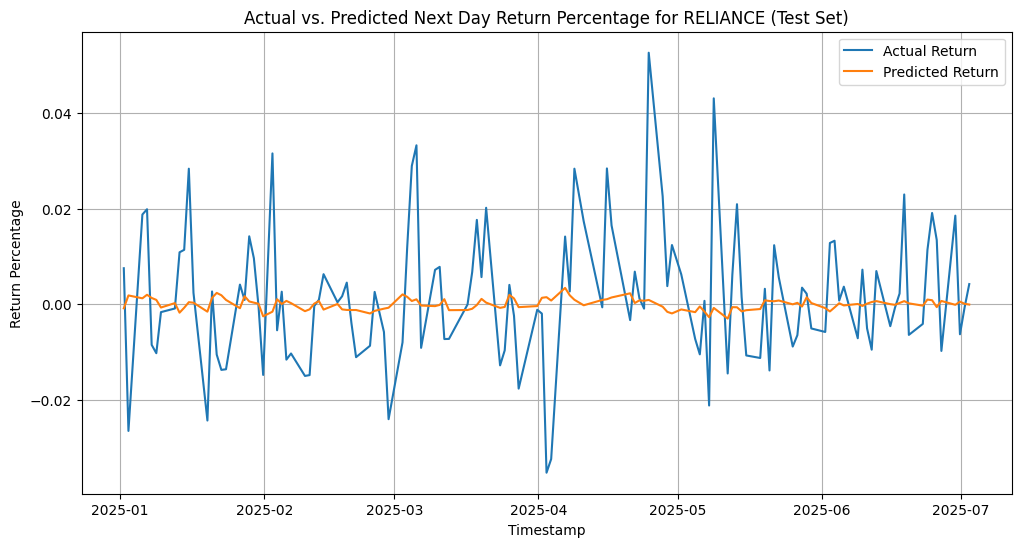

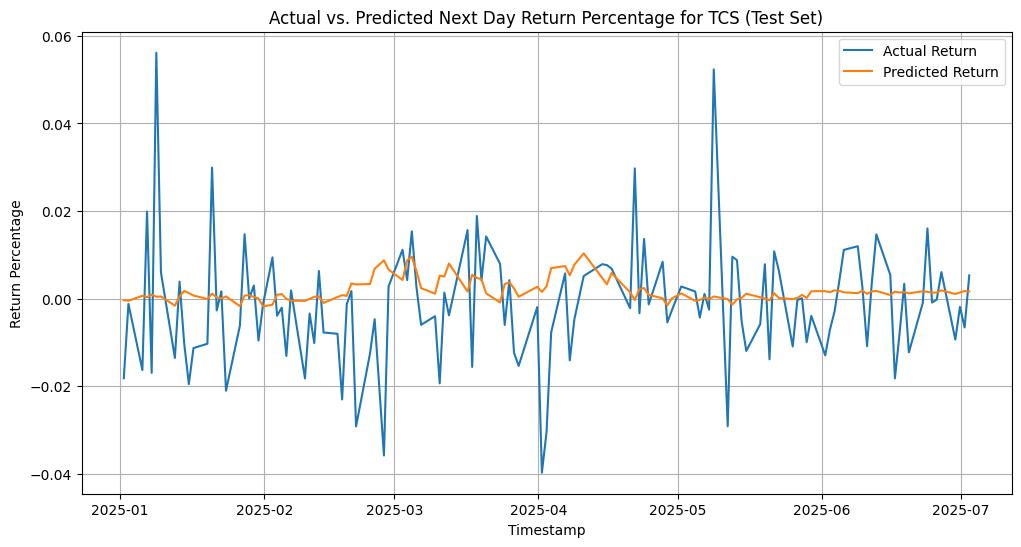

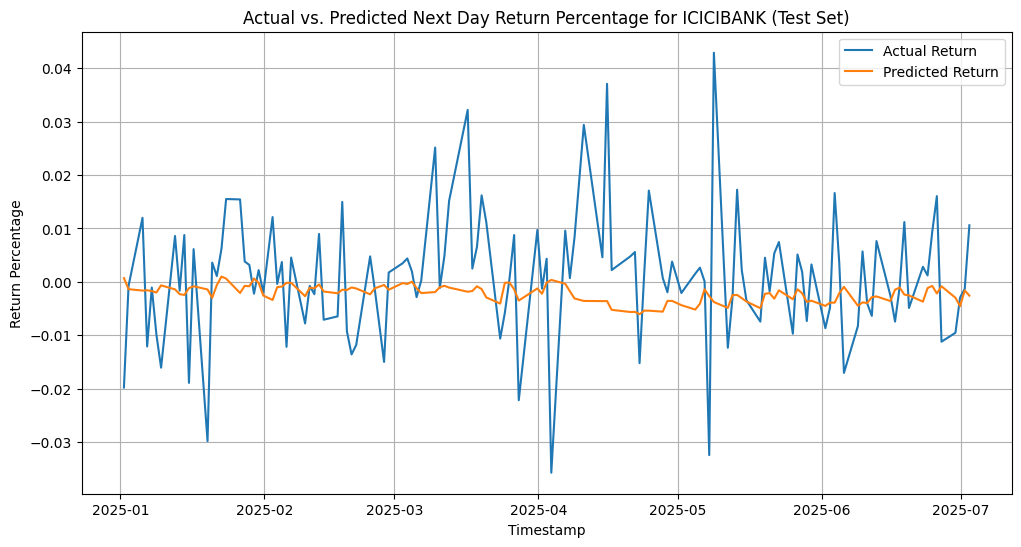

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the predictions to the test_data DataFrame for easier plotting
test_data_with_predictions = test_data.copy()
test_data_with_predictions['Predicted_Return'] = y_pred_best

# Select a few symbols to visualize (you can change these)
symbols_to_visualize = ['RELIANCE', 'TCS', 'ICICIBANK']

# Plot actual vs predicted returns for each selected symbol
for symbol in symbols_to_visualize:
    symbol_data = test_data_with_predictions[test_data_with_predictions['Symbol'] == symbol]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=symbol_data, x='timestamp', y='Target_Return', label='Actual Return')
    sns.lineplot(data=symbol_data, x='timestamp', y='Predicted_Return', label='Predicted Return')
    plt.title(f'Actual vs. Predicted Next Day Return Percentage for {symbol} (Test Set)')
    plt.xlabel('Timestamp')
    plt.ylabel('Return Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

In [18]:
%pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [19]:
import joblib
joblib.dump(best_lgbm, "roc_model.pkl") 


['roc_model.pkl']

In [20]:
import lightgbm
print(lightgbm.__version__)

4.5.0
